<a href="https://colab.research.google.com/github/easypanda/Handson-ML2/blob/master/Chapter%205%3A%20Support%20Vector%20Machines/Exercices_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the fundamental idea behind Support Vector Machines?

The fundamental idea behind Support Vector Machines (SVM) is to draw the widest possible street between classes by creating a separating hyperplane between them (the widest decision boudaries). This is called **Large Margin Classification**.
When performing soft margin classification, the SVM searches for a compromise between perfectly seperating two classes having the widest possible street. Another key idea is to use the kernel trick to separate nonlinear data.

# What is a support vector?

A support vector is any instance located on the street, including its borders. The decision boudary is entirely decided by the support vector. Any instance that is not a support vector has no influence. As long as they stay off the street, they have no influence and won't affect the decision boundary. Computing the predictions only involves the support vectors, not the whole training set.

# Why is it important to scale the inputs when using SVMs?

It is important to scale the inputs when using SVM because SVMs are sensitive to it and it might change the shape of the widest street possible. In order words, if the training set is not scaled, the SVM will tend to neglect small features.

# Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

An SVM classifier can output the distance between the test instance and the decision boundary, and can be used as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If probability=True is set, it will calibrate the probabilities using Logistic Regression on the SVM's Scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() to the SVM.

# Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

The question applies only to linear SVMs since kernelized SVMs can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m^2 and m^3. So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.

# Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?

In case of underfitting:
* We can increase Y (Gamma).
* We can increace C.

In case of overfitting:
* We can decrease Y (Gamma).
* We can decrease C.

The hyperparameter Y (Gamma) will change the shape of the bell-shaped curve ( in case of Gaussian RBF). A large Y makes the decision boundaries more irregular, wiggling around individual instances whereas a small Y will make the decision boundaries more smooth by making the bell-shaped curve wider.
C is the hyperparameter which controls the number of instance that are not in the good side of the margin (margin violation). The higher it is, the lesser margin violation we have.

If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, we need to increase the gamma or C (or both).

# How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

* H is equal to H', plus m columns of 0s on the right and m rows of 0s at the bottom: H = (H's 0...)
                                                                       (0 0 0...)        
                                                                       
* f is equal to f' with an additional elements, all equal to the value of the hyperparameter C.

* b is equal to b' with m additional elements, all equal to 0.

* A is equal to A' with an extra m * n identity matrix Im appened to the right, - * I * m just below it, and the rest filled with 0s : A = ( A' Im)
                                                                                                 ( 0 -Im)

# Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [35]:
# Importing the libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import SGDClassifier

In [36]:
#Loading the dataset
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [37]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
#Split the target from the rest of the features
X = iris["data"]
y = iris["target"]

In [39]:
#Charging the model
LinearSVC_clf = LinearSVC(C=1,loss="hinge")
SVC_clf = SVC(kernel="linear",C=1)
SGDClassifier_clf = SGDClassifier(loss='hinge',alpha= 1 / len(X) * 1)

In [40]:
LinearSVC_clf.fit(X,y)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [41]:
SVC_clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
SGDClassifier_clf.fit(X,y)

SGDClassifier(alpha=0.006666666666666667, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import f1_score

In [44]:
#Score of the model
f1_score(LinearSVC_clf.predict(X),y, average=None)

array([1.        , 0.90526316, 0.91428571])

In [45]:
f1_score(SVC_clf.predict(X),y, average=None)

array([1.        , 0.98989899, 0.99009901])

In [46]:
f1_score(SGDClassifier_clf.predict(X),y, average=None)

array([0.97087379, 0.87619048, 0.89130435])

# Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

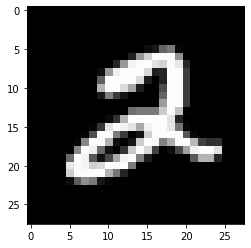

2


In [4]:
#One image and its label
plt.imshow(X[5].reshape((28,28)), cmap='gray')
plt.show()
print(y[5])

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [6]:
SSS = StratifiedShuffleSplit(n_splits=1,train_size=0.7,test_size=0.3,random_state=42)

In [7]:
for train_index, test_index in SSS.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [68458 68045 56976 ... 29416 53176 26664] TEST: [22167  3842 60035 ... 18445 15995  2665]


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,\
                            classification_report,\
                            precision_score,\
                            accuracy_score,\
                            recall_score,\
                            roc_auc_score,\
                            roc_curve,\
                            f1_score
#Using the Sklearn visualization API...
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall,plot_roc_curve

In [9]:
model = Pipeline([
    ("StandardScaler",StandardScaler()),
    ("SVM",SVC(random_state=42,decision_function_shape="ovr"))
])

In [10]:
params = {
    'SVM__C': [1,3,5],
        }

In [11]:
SVM_GridSearchCV = GridSearchCV(model,param_grid=params,n_jobs=-1,verbose=10)

In [12]:
SVM_GridSearchCV.fit(X_train[:3000],y_train[:3000])
print(f"Our best parameters: {SVM_GridSearchCV.best_params_}")
print(f"Our best estimator: {SVM_GridSearchCV.best_estimator_}")
print(f"Our best score: {SVM_GridSearchCV.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    8.6s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    8.6s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   14.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   14.8s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   14.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   18.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   18.4s finished
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value o

Our best parameters: {'SVM__C': 3}
Our best estimator: Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Our best score: 0.9143333333333333


In [29]:
#We use the best model
SVM_GridSearchCV.best_estimator_.fit(X_train,y_train)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [32]:
def print_metrics(predicted_y,y_test):   
    print("\n")
    print(f"Accuracy Score : {(accuracy_score(predicted_y,y_test))}")
    print(f"Precision Score : {(precision_score(predicted_y,y_test,average=None))}")
    print(f"Recall Score : {(recall_score(predicted_y,y_test,average=None))}")
    print(f"F1 Score : {(f1_score(predicted_y,y_test,average=None))}")
    print("\n")
    print(plot_confusion_matrix(predicted_y,y_test))
    print(f"{classification_report(predicted_y,y_test)}")

In [33]:
#We do the final prediction!
predicted_y = SVM_GridSearchCV.predict(X_test)



Accuracy Score : 0.9675238095238096
Precision Score : [0.9884114  0.98391875 0.96804959 0.95985061 0.95896434 0.95723337
 0.97285507 0.97303473 0.95996094 0.94968855]
Recall Score : [0.97895744 0.98558711 0.95754717 0.97302414 0.9722635  0.97107659
 0.97759377 0.92969432 0.96656834 0.96494645]
F1 Score : [0.9836617  0.98475222 0.96276974 0.96639248 0.96556813 0.96410529
 0.97521866 0.95087092 0.96325331 0.9572567 ]


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2091
           1       0.98      0.99      0.98      2359
           2       0.97      0.96      0.96      2120
           3       0.96      0.97      0.97      2113
           4       0.96      0.97      0.97      2019
           5       0.96      0.97      0.96      1867
           6       0.97      0.98      0.98      2053
           7       0.97      0.93      0.95      2290
           8       0.96      0.97      0.96      2034


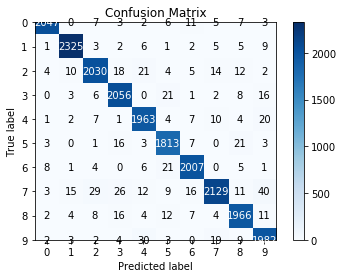

In [34]:
print_metrics(predicted_y,y_test)

# Train an SVM regressor on the California housing dataset.

In [47]:
X, y = fetch_openml('houses', version=1, return_X_y=True)

In [48]:
#Shape of the dataset
print(X.shape,y.shape)

(20640, 8) (20640,)


In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
model_pipeline = Pipeline([
    ("StandardScaler",StandardScaler()),
    ("SVR",SVR())
])

In [55]:
params = {
    "SVR__kernel" : ["poly","rbf"],
    "SVR__degree" : [1,2,3],
    "SVR__C" : [10,100,500],
    "SVR__epsilon" : [0.1,1]
}

In [56]:
svr_gridsearch = GridSearchCV(model_pipeline,param_grid=params,n_jobs=-1,verbose=10) 

In [57]:
svr_gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('StandardScaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVR',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'SVR__C': [10, 100, 500], 'SVR__degree': [1, 2, 3],
     

In [58]:
print(f"Our best parameters: {svr_gridsearch.best_params_}")
print(f"Our best estimator: {svr_gridsearch.best_estimator_}")
print(f"Our best score: {svr_gridsearch.best_score_}")

Our best parameters: {'SVR__C': 500, 'SVR__degree': 1, 'SVR__epsilon': 1, 'SVR__kernel': 'poly'}
Our best estimator: Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=500, cache_size=200, coef0=0.0, degree=1, epsilon=1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)
Our best score: 0.5605978534283805


In [59]:
predicted_y = svr_gridsearch.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
print(f"The RMSE of our model is :  {(np.sqrt(mean_squared_error(predicted_y,y_test)))}")
print(f"The MAE of our model is :  {(mean_absolute_error(predicted_y,y_test))}")

The RMSE of our model is :  75079.45645741058
The MAE of our model is :  52510.62517259923
